In [6]:
!pip install seaborn

In [7]:
!pip install scikit-learn

In [12]:
# Allows charts to appear in the notebook
%matplotlib inline

# Libraries for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [13]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('Muffin.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


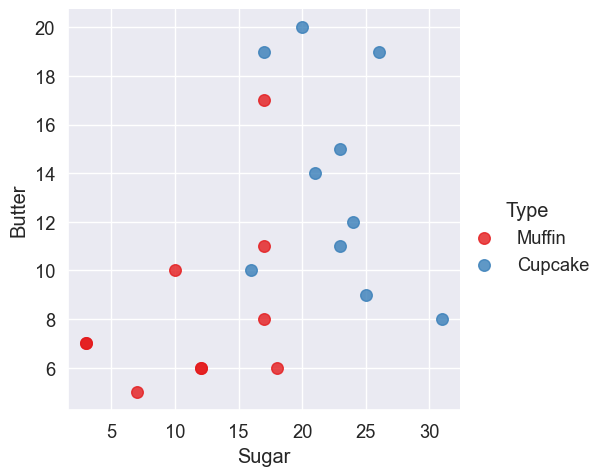

In [29]:
# Plot two ingredients
# Create scatterplot of dataframe

sns.lmplot(x='Sugar', y='Butter', data=recipes, hue='Type', 
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [30]:
# Specify inputs for the model

# sugar_butter=recipes[['Sugar', 'Butter']].as_matrix() 舊版

sugar_butter=recipes[['Sugar', 'Butter']].to_numpy()
type_label=np.where(recipes['Type']=='Muffin', 0, 1)

In [32]:
# Fit the SVM model

model=svm.SVC(kernel='linear', C=2**-5)

In [33]:
model.fit(sugar_butter, type_label)

SVC(C=0.03125, kernel='linear')

In [34]:
# Get the separating hyperpane

w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5, 30)
yy = a * xx - (model.intercept_[0]) / w[1]

In [35]:
# Plot the parallels to the spearatig  hyperpane
# that pass through the support vectors

b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

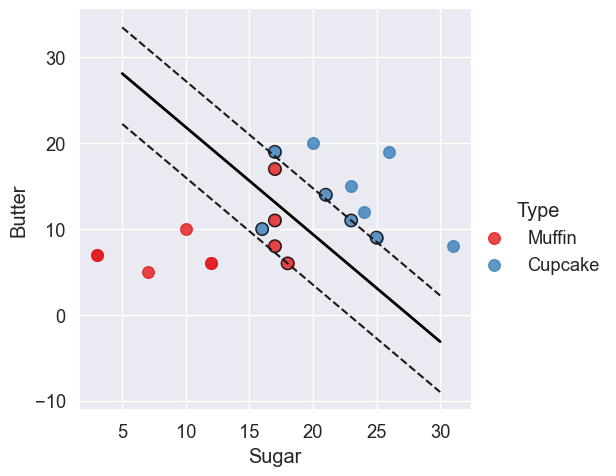

In [36]:
# Look at the margins and support vectors

sns.lmplot(x='Sugar', y='Butter', data=recipes, hue='Type', 
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
            s=80, facecolors='none', edgecolors='k')

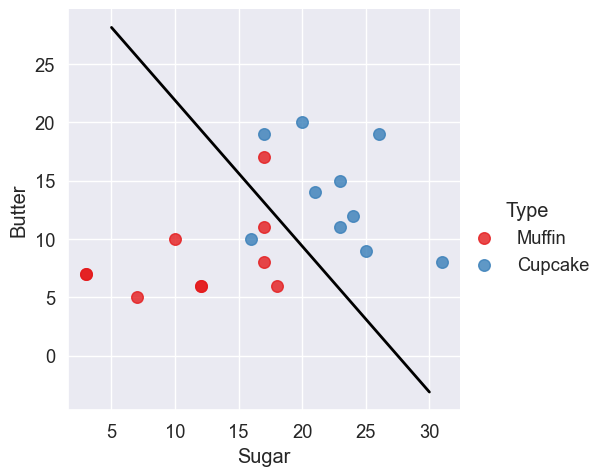

In [37]:
# Plot the hyperplane

sns.lmplot(x='Sugar', y='Butter', data=recipes, hue='Type', 
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')

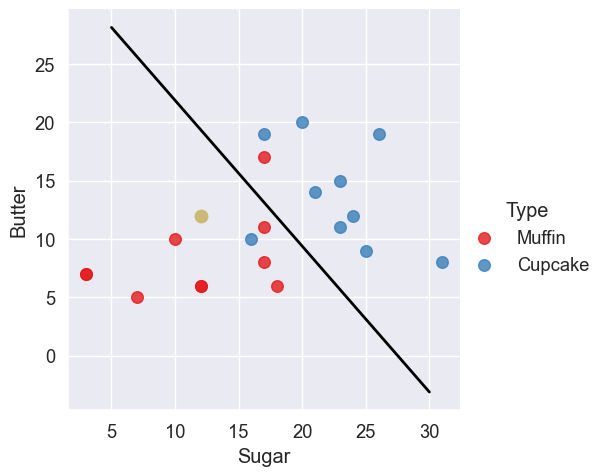

In [38]:
# Plot the point to visually see where the point lies

sns.lmplot(x='Sugar', y='Butter', data=recipes, hue='Type', 
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(12, 12, 'yo', markersize=9)

In [39]:
# Create a function to guess when a recipe is a muffin
# or a cupcake using the SVM model we created

def muffin_or_cupcake(butter, sugar):
    if(model.predict([[butter, sugar]]) == 0):
        print("You're looking at a muffin recipe!")
    else:
        print("You're looking at a cupcake recipe!")

In [40]:
# Predict if 12 parts butter and sugar

muffin_or_cupcake(12, 12)

You're looking at a muffin recipe!


In [41]:
# Fit the SVM model

model = svm.SVC(kernel='linear', decision_function_shape='ovr')
model.fit(sugar_butter, type_label)

SVC(kernel='linear')

In [42]:
# Fit the SVM model for more than 2 classes

model = svm.SVC(kernel='rbf', C=1, gamma=2**-5)
model.fit(sugar_butter, type_label)

SVC(C=1, gamma=0.03125)